# CompStats TP3 : Hasting-Metropolis (and Gibbs) samplers

### Author : Vincent HERFELD

## Exercise 1: Hasting-Metropolis within Gibbs – Stochastic Approximation EM

We set ourselves in the following setting :

There are N individuals each indexed by $i \in \{1,...,N\}$ for which we have made $k_i$ mesurements (these can be any kind of mesure related to a patient (weight, volume of brain structures, protein concentration, tumoral score, etc.) we denote these by $\{y_{i,j}\}_{j = 1}^{k_i}$. For any $i \in \{1,...,N\}$, we assume that the measurements $\{y_{i,j}\}_{j = 1}^{k_i}$ are independent and are obtained at times $\{t_{i,j}\}_{j=1}^{k_i}$ where $t_{i,1} < ... < t_{i,ki}$.

We which to study the trajectories in time given by these mesurements.

## 1.A – A population model for longitudinal data

We assume that the average progression is given by the straight line which goes through the point $p_0$ at time $t_0$ with velocity $v_0$ where
$$
\begin{align*}
    d(t) := p_0 + v_0(t − t_0)
\end{align*}
$$

with $p_0 \sim \mathcal{N}(\bar{p_0},σ_{p_0}^2) ; t_0 \sim \mathcal{N}(\bar{t_0},σ_{t_0}^2) ; v_0 \sim \mathcal{N}(\bar{v_0},σ_{v_0}^2)$
and $σ_{p_0}, σ_{t_0} , σ_{v_0}$ are $\bf{fixed}$ variance parameters. We also assume that $p_0$ is $\bf{fixed}$ equal to 0.

We also model the progression of each individual by an affine re-parameterization of the average trajectory which allows to characterize changes in speed and delay in the progression of the i-th individual with respect to the average trajectory : 

$$
\begin{align*}
    d_i(t) := d(\alpha_i(t − t_0 − \tau_i) + t_0).
\end{align*}
$$

So we consider :

$$
\begin{equation*}
  \left\{
    \begin{aligned}
      & y_{i,j} = d_i(t_{i, j}) + \epsilon_{i,j} \text{ where } \epsilon_{i,j} \sim \mathcal{N}(0, \sigma^2 )\\
      & \alpha_i = \exp(\xi_i) \text{ where } \xi_i \sim \mathcal{N}(0,\sigma_\xi^2) \\
      & \tau_i\sim \mathcal{N}(0,\sigma_\tau^2)
    \end{aligned}
  \right.
\end{equation*}
$$



This said, the parameters of the model are $θ = (\bar{t_0},\bar{v_0},σ_ξ,σ_τ,σ)$. For all $i ∈ \{1,...,N\}$, the random variable $z_i = (α_i, τ_i)$ corresponds to random effects and $z_{pop} = ( t_0, v_0 )$ to fixed effects. The fixed effects are used to model the group progression whereas random effects model individual progressions. Likewise, we define $θ_{ind} = (σ_ξ, σ_τ , σ)$ and $θ_{pop} = ( t_0, v_0 )$.

This means that we can deduce that $y_{i,j} | \theta \sim \mathcal{N}(d_i(t_{i, j}),\sigma^2 )$ and $\alpha_i | \theta \sim$ Lognormal$(0, \sigma_\xi^2)$

We consider a Bayesian framework and assume the following a priori on the parameters $θ$ : 

$\bar{t_0} ∼ N(\bar{\bar{t_0}},s^2_{t_0} ) ;\; \bar{v_0} ∼ N(\bar{\bar{v_0}},s^2_{v_0} )$

$σ_ξ^2 ∼ \mathcal{W}^{−1}(v_ξ,m_ξ) ;\; σ_\tau^2 ∼ \mathcal{W}^{−1}(v_\tau,m_\tau) ;\; σ^2 ∼ \mathcal{W}^{−1}(v,m).$

where $\mathcal{W}^{−1}(v,m) \;\; (v > 0, m ∈ N∗)$ is the inverse-Gamma distribution whose density w.r.t. the Lebesgue measure is given by:

$$
\begin{align*}
    f_{\mathcal{W}^{−1}}(\sigma^2) = \frac{1}{\Gamma(\frac{m}{2})} \frac{1}{\sigma^2} \left(\frac{v}{\sigma \sqrt{2}}\right)^m  \exp\left(-\frac{v^2}{2\sigma^2}\right) 
\end{align*}
$$

### Question 1:

We will write the log-likelihood for this problem using Bayes law when supposing that $\forall i, k_i = k \in \mathbb{N}^*$, $z = (z_{pop}, \{z_i\}_{i=1}^{N})$ where $\{z_i\}_{i=1}^{N}$ are iid and $y = \{y_{i,j}\}_{i \in {1,...,N}, j\in \{1,...,k_i\}}$:

$q(y,z,\theta) = q(y | z,\theta)q(z,\theta) = q(y | z,\theta)q(z|\theta)q(\theta) = q(y | z,\theta)q(z_{pop}|\theta)q(\theta)\prod_{i=1}^Nq(z_i|\theta) $ 

Taking the log and considering the distributions of each variable we have :

$\log q(y,z,\theta) = \log q(y | z,\theta) + \log q(z_{pop}|\theta) + \log q(\theta) + \sum_{i=1}^N \log q(z_i|\theta)$

we will decompose each term and using the model we notice that the densities contain exponentials so the log will simplify the terms. We will also use the fact that all the joint-variables we consider are independant so we have that the joint densities are the product of the marginal densities:

$$
\begin{align*}
\log q(y | z,\theta) &= \log \prod_{i \in {1,...,N}, j\in \{1,...,k\}} q(y_{i,j} | z,\theta) = \sum_{i=1}^{N} \sum_{j = 1}^{k} \log  q(y_{i,j} | z,\theta) = \frac{-1}{2}\sum_{i=1}^{N} \sum_{j = 1}^{k} \frac{(y_{i,j}-d_i(t_{i,j}))^2}{\sigma^2} - kN\left(\log(\sigma) + \frac{\log(2\pi)}{2}\right)\\
\log q(z_{pop}|\theta) &= \log q(t_0|\theta) + \log q(v_0|\theta) = \frac{-1}{2}\left(\left(\frac{t_0 - \bar{t_0}}{\sigma_{t_0}}\right)^2 + \left(\frac{v_0 - \bar{v_0}}{\sigma_{v_0}}\right)^2\right) - \log(\sigma_{t_0}) -  \log(\sigma_{v_0}) -  \log(2\pi)\\
\log q(z_i|\theta) &= \log q(\tau_i|\theta) + \log q(\alpha_i|\theta) = \frac{-1}{2}\left(\left(\frac{\tau_i}{\sigma_{\tau}}\right)^2 + \left(\frac{\log(\alpha_i)}{\sigma_\xi}\right)^2\right) - \log(\sigma_\tau) - \log(\alpha_i) - \log(\sigma_\xi) - \log(2\pi)\\
\end{align*}
$$


$$
\begin{align*}
\log q(\theta) &= \log q(\bar{t_0}) + \log q(\bar{v_0}) + \log q(\sigma_\xi) + \log q(\sigma_\tau) + \log q(\sigma)\\
&= \frac{-1}{2}\left(\left(\frac{\bar{t_0} - \bar{\bar{t_0}}}{s_{t_0}}\right)^2 + \left(\frac{\bar{v_0} - \bar{\bar{v_0}}}{s_{v_0}}\right)^2\right) - \log(s_{t_0}) - \log(s_{v_0}) - \log(2\pi) - 2\log(\sigma_\xi) \\
&- \log(\Gamma(\frac{m_\xi}{2})) + m_\xi(\log(v_\xi) - \log(\sqrt{2}\sigma_\xi)) - \frac{v^2_\xi}{2\sigma_\xi^2} - 2\log(\sigma_\tau) - \log(\Gamma(\frac{m_\tau}{2})) + m_\tau(\log(v_\tau) - \log(\sqrt{2}\sigma_\tau)) - \frac{v^2_\tau}{2\sigma_\tau^2} - 2\log(\sigma)\\ &- \log(\Gamma(\frac{m}{2})) + m(\log(v) - \log(\sqrt{2}\sigma)) - \frac{v^2}{2\sigma^2}
\end{align*}
$$

Since we are in a Bayesian setting we will suppose that the parameters of the priors are known and since we want to maximise the log-likelihood the terms that do not depend on $z$ or $\theta$ will be considered as a constant to simplify the notations.

We also notice that the model belongs to the curved exponential family $i.e.$ the log-likelihood can be written ender the form $\log q(y,z,\theta) = -\Phi(\theta) + \langle S(y,z), \Psi(\theta) \rangle + cst$

where 

$$
\begin{align*}
-\Phi(\theta) = &-\frac{1}{2}\left(\left(\frac{\bar{t_0}}{\sigma_{t_0}}\right)^2 + \left(\frac{\bar{v_0}}{\sigma_{v_0}}\right)^2 + \left(\frac{\bar{t_0}}{s_{t_0}}\right)^2 + \left(\frac{\bar{v_0}}{s_{v_0}}\right)^2 + \left(\frac{t_0}{\sigma_{t_0}}\right)^2 + \left(\frac{v_0}{\sigma_{v_0}}\right)^2\right) + \frac{\bar{t_0}\bar{\bar{t_0}}}{s_{t_0}^2} + \frac{\bar{v_0}\bar{\bar{v_0}}}{s_{v_0}^2}\\ 
&- (m_\xi + 2 + N)\log(\sigma_\xi)- (m_\tau + 2 + N)\log(\sigma_\tau)- (m + 2 + kN)\log(\sigma) - \frac{1}{2}\left(\frac{v_\xi^2}{\sigma_\xi^2} + \frac{v_\tau^2}{\sigma_\tau^2} + \frac{v^2}{\sigma^2}\right) - \sum_{i=1}^{N} \log(\alpha_i)
\end{align*}
$$

and $S = (S_1, S_2, S_3, S_4,S_5)$, $\Psi(\theta) = (\psi_1(\theta), \psi_2(\theta), \psi_3(\theta), \psi_4(\theta),\psi_5(\theta))$ 

where 

$$
\begin{align*}
S_1 &= t_0 \quad S_2 = v_0 \quad S_3 = \frac{1}{N}\sum_{i=1}^{N} \log(\alpha_i)^2 \quad S_4 = \frac{1}{N}\sum_{i=1}^{N} \tau^2_i \quad
S_5 =  \frac{1}{kN}\sum_{i=1}^{N} \sum_{j=1}^{k} (y_{i,j} - d_i(t_{i,j}))^2\\
\psi_1(\theta) &= \frac{\bar{t_0}}{2\sigma_{t_0}^2} \quad \psi_2(\theta) = \frac{\bar{v_0}}{2\sigma_{v_0}^2} \quad \psi_3(\theta) = \frac{-N}{2\sigma_\xi^2} \quad \psi_4(\theta) = \frac{-N}{2\sigma_\tau^2} \quad \psi_5(\theta) = \frac{-kN}{2\sigma^2}
\end{align*}
$$

### Question 2:

Let's sample synthetic data given the previous model and setting the parameters :

$\sigma_{t_0} = \sigma_{v_0} = 0.1$, $s_{t_0} = s_{v_0} = 0.1$, $\bar{\bar{t_0}} = \bar{\bar{v_0}} = 1$, $m = m_\xi = m_\tau \in [5, 10]$, $v = v_\xi = v_\tau \in [1, 5]$, $N = 100$, $k= 20$

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numba import jit
import numba as nb

np.random.seed(2100)

p0 = 0

@jit(nopython=True)
def d(t, t0, v0):
    return p0 + v0*(t - t0)

@jit(nopython=True)
def di(t, t0, v0, alph, tau):
    return d(alph*(t - tau - t0) + t0, v0, t0)

In [70]:
N = 100
k = 20
sigma_t0 = sigma_v0 = 0.1
s_t0 = s_v0 = 0.1
t0_bar_bar = v0_bar_bar = 1
m = m_xi = m_tau = 5
v = v_xi = v_tau = 1

sigma2_tau = scipy.stats.invgamma.rvs(a = m_tau/2, scale=v_tau**2/2)
sigma2_xi = scipy.stats.invgamma.rvs(a = m_xi/2, scale=v_xi**2/2)
sigma2 = scipy.stats.invgamma.rvs(a = m/2, scale=v**2/2)

print("sigma2_xi : {}".format(sigma2_xi))
print("sigma2_tau : {}".format(sigma2_tau))
print("sigma2: {}".format(sigma2))

v0_bar = np.random.normal(v0_bar_bar, s_v0)
t0_bar = np.random.normal(t0_bar_bar, s_t0)

v0 = np.random.normal(t0_bar, sigma_v0)
t0 = np.random.normal(v0_bar, sigma_v0)

t = np.linspace(np.zeros(N) + 1, 20*np.ones(N), k).T

tau = np.random.normal(loc = 0, scale = np.sqrt(sigma2_tau), size = N).reshape(-1,1)
alph = np.exp(np.random.normal(loc = 0, scale = np.sqrt(sigma2_xi), size = N)).reshape(-1,1)
y = di(t, t0, v0, alph, tau) + np.random.normal(0, np.sqrt(sigma2), size = (N,k))

theta_real = np.array([t0_bar, v0_bar, np.sqrt(sigma2_xi), np.sqrt(sigma2_tau), np.sqrt(sigma2)])
z_real = np.concatenate(([t0], [v0], alph.flatten(), tau.flatten()))

sigma2_xi : 0.3313263589070211
sigma2_tau : 0.10630492188396248
sigma2: 0.3340499535178676


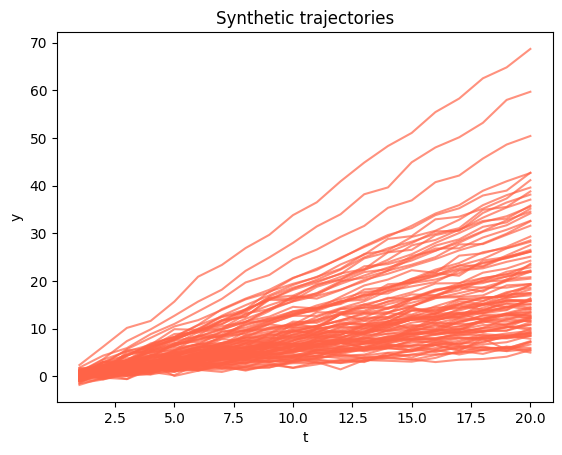

In [71]:
plt.title("Synthetic trajectories")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(t.T,y.T, c="tomato", alpha=0.7)
plt.show()

## 1.B – HM-SAEM – Hasting-Metropolis sampler

To be able to maximise the log-likelihood we need to be able to sample from the à posteriori distribution $p( . |y, \theta)$ and to do so we will use the Hasting-Metropolis sampler. We will use the Symmetric Random Walk Hasting-Metropolis algorithm, where we consider the proposal distribution as a symmetric distribution (here the multivariate Gaussian distribution $\mathcal{N}(z,σ^2 I_N)$) and this will simplify the acceptance ratio to be $\alpha(x,y) = 1 \land \frac{\pi(y)}{\pi(x)}$.

We know thanks to the Bayes rule that $q(z | y, \theta) = \frac{q(z, y, \theta)}{q(y, \theta)} = \frac{q(z,y, \theta)}{q(y | \theta)q(\theta)} = \frac{q(z,y|\theta)}{q(y | \theta)} = \frac{q(y|z, \theta)q(z|\theta)}{q(y | \theta)}$ and since we will consider the quotient of this density we only need the numerator.

>$\log q(y|z, \theta) = \sum_{i=1}^{N} \sum_{j=1}^{k} \log q(y_{i,j} | z, \theta)$

>$\log q(z | \theta) = \log q(t_0| \theta) + \log q(v_0| \theta) + \sum_{i=1}^{N} \log q(\alpha_i| \theta) + \log q(\tau_i| \theta)$

To simplify calculations we will consider the exp - log of the acceptance rate and in that case we notice that there are constants for $z$ in the previous densities that will simplify.

So what we take is :

>$\log q(y | z,\theta) = \frac{-1}{2}\sum_{i=1}^{N} \sum_{j = 1}^{k} \frac{(y_{i,j}-d_i(t_{i,j}))^2}{\sigma^2} + cst$

>$\log q(z | \theta) = -\frac{1}{2}\sum_{i=1}^{N}\left(\left(\frac{\tau_i}{\sigma_{\tau}}\right)^2 + \left(\frac{\xi_i}{\sigma_\xi}\right)^2\right) - \frac{t_0 - t_0\bar{t_0}}{2\sigma_{t_0}^2} -\frac{v_0 - v_0\bar{v_0}}{2\sigma_{v_0}^2} - \sum_{i = 1}^N \log(\alpha_i) + cst$

and as it has been said the constants will cancel out so we can neglect them.


### Question 3:



In [142]:
@jit(nopython=True) #method so that uniform function with numba
def generate_uniform():
    return np.random.uniform(0, 1)

@jit(nopython=True)
def log_posterior(z, y, theta):
    #calculate log posterior in z
    log_q_1 = -((y - di(t, z[0], z[1], z[2:N+2].reshape(-1,1), z[N+2:].reshape(-1,1)))**2).sum()/(2 * theta[4]**2)
    log_q_2 = -((z[N+2:] / theta[3])**2 + (np.log(z[2:N+2]) / theta[2])**2).sum()/2 - (z[0]-z[0]*theta[0])/(2*sigma_t0**2) - (z[1]-z[1]*theta[1])/(2*sigma_v0**2) - np.log(z[2:N+2]).sum()
    return log_q_1 + log_q_2

@jit(nopython=True)
def accept(zk, yk, theta, y, params = None):
    
    #compute difference of posterior evaluated in new proposition and previous value
    log_post_diff = log_posterior(yk, y, theta) - log_posterior(zk, y, theta)
    
    #return acceptance value
    return np.exp(np.min(np.array([0.0, log_post_diff])))

@jit(nopython=True)
def HM(z0, y, theta, accept, params = None, maxIter = 2000, sigma_prop = 1e-2):
    M = z0.shape[0]
    z = [z0]
    a = []
    n_acc = 0
    for n in range(maxIter):
        prev_z = z[-1]
        #Proposal
        yk = np.empty(M)
        for i in range(M):
            yk[i] = np.random.normal(prev_z[i], sigma_prop)
        #Acceptance-Rejection
        acc = accept(prev_z, yk, theta, y, params)
        a.append(acc)
        U = generate_uniform()
        if acc >= U: 
            z.append(yk)
            n_acc += 1
        else:
            z.append(prev_z)
        #print("The total acceptence ratio is : {}".format(n_acc/maxIter)) #prints the value of the acceptance rate, this was tuned to be in [0.2, 0.4] but .format doesn't work with jit
    return z,a
        

    

In [119]:
maxIter = 1000
z0 = 0.7*np.ones(2*N+2)

z_est_real,acc_est_real = HM(z_real, y, theta_real, accept, maxIter=maxIter)
z_est_real = z_est_real[-1]


z_est_0, acc_est_0 = HM(z0, y, theta_real, accept, maxIter=maxIter)
z_est_0 = z_est_0[-1]

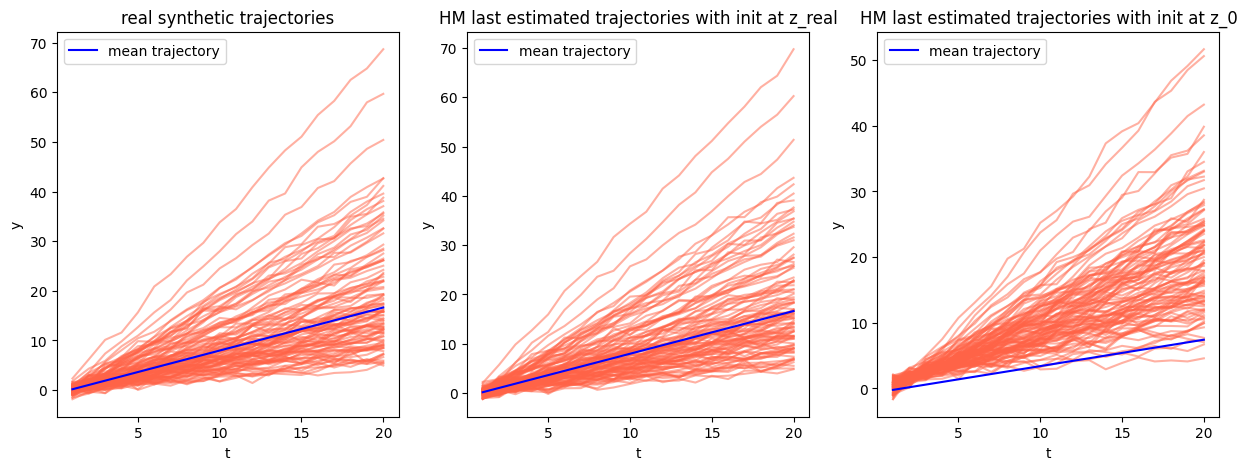

In [120]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs = axs.flatten()

y_est_real = di(t, z_est_real[0], z_est_real[1], z_est_real[2:N+2].reshape(-1,1), z_est_real[N+2:].reshape(-1,1)) + np.random.normal(0, theta_real[4], size = (N,k))
y_est_0 = di(t, z_est_0[0], z_est_0[1], z_est_0[2:N+2].reshape(-1,1), z_est_0[N+2:].reshape(-1,1)) + np.random.normal(0, theta_real[4], size = (N,k))

plt.title("Synthetic trajectories")
axs[0].plot(t.T, y.T, c="tomato", alpha=0.5)
axs[0].plot(t[0], d(t[0], z_real[0], z_real[1]), c='blue', label="mean trajectory")
axs[0].set_title("real synthetic trajectories")

axs[1].plot(t.T, y_est_real.T, c="tomato", alpha=0.5)
axs[1].plot(t[0], d(t[0], z_est_real[0], z_est_real[1]), c='blue', label="mean trajectory")
axs[1].set_title("HM last estimated trajectories with init at z_real")

axs[2].plot(t.T, y_est_0.T, c="tomato", alpha=0.5)
axs[2].plot(t[0], d(t[0], z_est_0[0], z_est_0[1]), c='blue', label="mean trajectory")
axs[2].set_title("HM last estimated trajectories with init at z_0")

for ax in axs:
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.legend()
plt.show()

In [121]:
print("estimations for the mean trajectory parameters : ")
print("estimation starting at a vector of ones : t_0 = {} and v_0 = {}".format(z_est_0[0], z_est_0[1]))
print("estimation starting at the real vector :  t_0 = {} and v_0 = {}".format(z_est_real[0], z_est_real[1]))
print("real vector :                             t_0 = {} and v_0 = {}".format(z_real[0], z_real[1]))

estimations for the mean trajectory parameters : 
estimation starting at a vector of ones : t_0 = 1.5634427819469645 and v_0 = 0.4022319152687659
estimation starting at the real vector :  t_0 = 0.8025411529117175 and v_0 = 0.8669887544054535
real vector :                             t_0 = 0.8025411529117175 and v_0 = 0.8669887544054535


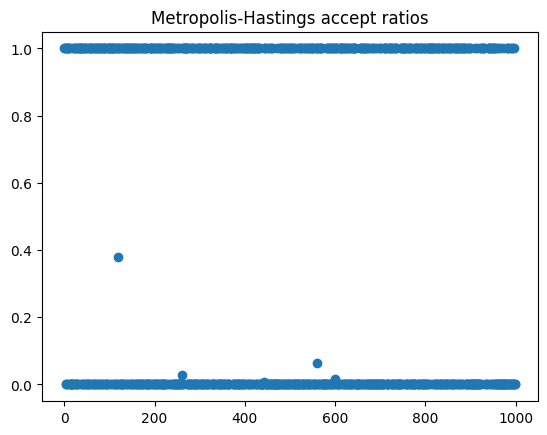

In [122]:
plt.title("Metropolis-Hastings accept ratios")
plt.scatter(np.arange(maxIter), acc_est_0)

Let's plot the true $z$ against our estimations, we will sort the arrays because there is no reason for the algorithm to place the right parameters at the right place for the $z_i$ part. 

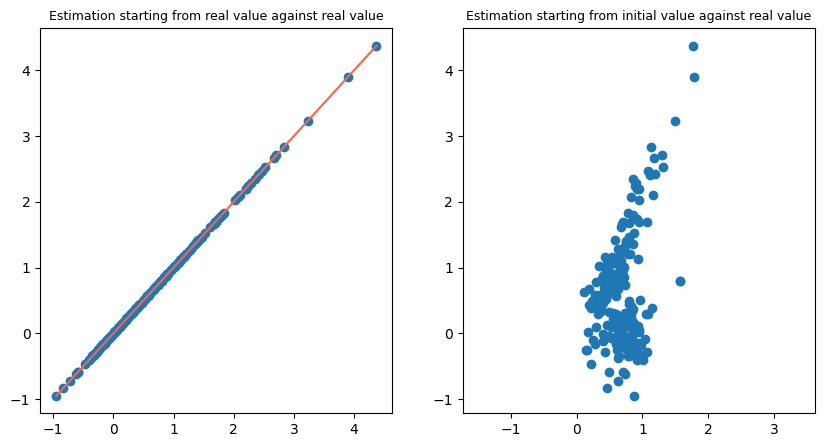

In [123]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

x = np.linspace(np.min(z_real), np.max(z_real), 100)

axs[0].scatter(np.concatenate((z_est_real[:2], z_est_real)), np.concatenate((z_real[:2], z_real)))
axs[0].plot(x,x, c='tomato')
axs[0].set_title("Estimation starting from real value against real value",size=9)

axs[1].scatter(np.concatenate((z_est_0[:2], z_est_0)), np.concatenate((z_real[:2], z_real)))
axs[1].set_title("Estimation starting from initial value against real value", size=9)
plt.axis("equal")

plt.show()


There is perfect correlation when starting at the right value, but when taking another initial value we lose it, or at least it seems like it because there is a loss of information between the real $z_i$ and the estimated ones. Meaning that our algorithm can estimate correctly (as we see in the previous plot) but it doesn't keep the right order for the trajectories. So this study is usefull when looking at large amounts of patients and the mean value not the individuals. For example we won't be able to reconstruct given the patient number the right trajectory. But his trajectory will appear amongst all the trajectories. We could try and sort the data to have an idea, but I don't believe it is a viable choice :

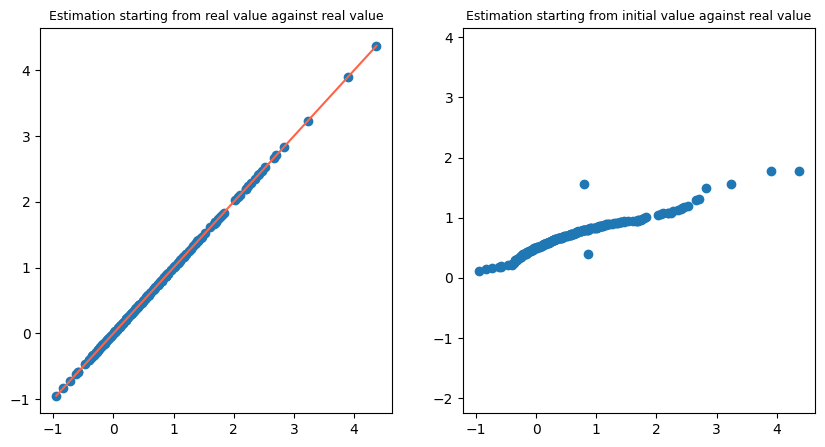

In [124]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

x = np.linspace(np.min(z_real), np.max(z_real), 204)

axs[0].scatter( np.concatenate((z_real[:2], np.sort(z_real))), np.concatenate((z_est_real[:2], np.sort(z_est_real))),)
axs[0].plot(x,x, c='tomato')
axs[0].set_title("Estimation starting from real value against real value",size=9)

axs[1].scatter(np.concatenate((z_real[:2], np.sort(z_real))), np.concatenate((z_est_0[:2], np.sort(z_est_0))))
axs[1].set_title("Estimation starting from initial value against real value", size=9)
plt.axis("equal")

plt.show()

We better see correlation, even though there is bias since on the left the line doesn't pass through the origin.

## 1.C – HM-SAEM – MCMC SAEM algorithm

In this part we will implement the MCMC SAEM algorithm for our model of the curved exponential family, that will help solve our likelihood maximisation problem like the classical EM. The difference here is that the estimation step of the EM algorithm is harder since the we cannot sample directly from the posterior density. This E step is thus divided in 2 steps :  S and A. First we Simulate the distribution in the S step using the MCMC HM algorithm, then we Approximate the Expectation of the E step. Luckily this is simplified when the model is in the curved exponential family because we will just approximate the $S$ part of the log likelihood since it doesn't depend on the model parameters. And once that is done we solve the Maximisation step for the parameters using the updated $S$ value. 

So in short an SAEM step looks like :

>- E step :
    - Simulate $ z^{(k+1)} \sim p(.|y,\theta^{(k)})$ using the above HM sampler.
    - Approximate $S^{(k+1)} = S^{(k)} + ε_k(S(y, z^{(k+1)}) − S^{(k)})$,
>- M step :
    - Find $\theta^{(k+1)} = \underset{\theta \in \Theta}{argmax} \left\{-\Phi(\theta) + \langle S^{(k+1)} , \Psi(\theta) \rangle \right\}$
    
### Question 4 :

Now we will derive the updates that solve the M step, again in this model the problem is simplified by the fact that there are closed form expressions that solve the M step. We recall that the exponential curve is concave so to  maximize $-\Phi(\theta) + \langle S^{(k+1)} , \Psi(\theta) \rangle$ at time $k+1$, we just need to find the zeros of the gradient in $\theta$ we will note this function $L$ in the following to simplify notations:

$$
\begin{align*}
&\frac{L}{\partial t_0} = \frac{\bar{\bar{t_0}}}{s^2_{t_0}} + \frac{S_1}{\sigma_{t_0}^2} - \frac{\bar{t_0}}{s^2_{t_0}} - \frac{\bar{t_0}}{\sigma^2_{t_0}} = 0 \Longrightarrow t_0^{(k+1)} = \left(\frac{\bar{\bar{t_0}}}{s^2_{t_0}} + \frac{S^{(k+1)}_1}{\sigma_{t_0}^2}\right)\left(\frac{1}{s^2_{t_0}} + \frac{1}{\sigma^2_{t_0}}\right)^{-1}\\
&\frac{L}{\partial v_0} = \frac{\bar{\bar{v_0}}}{s^2_{v_0}} + \frac{S_2}{\sigma_{v_0}^2} - \frac{\bar{v_0}}{s^2_{v_0}} - \frac{\bar{v_0}}{\sigma^2_{v_0}} = 0 \Longrightarrow v_0^{(k+1)} = \left(\frac{\bar{\bar{v_0}}}{s^2_{v_0}} + \frac{S^{(k+1)}_2}{\sigma_{v_0}^2}\right)\left(\frac{1}{s^2_{v_0}} + \frac{1}{\sigma^2_{t_0}}\right)^{-1}\\
&\frac{L}{\partial \sigma_\xi} = -\frac{m_\xi + 2 + N}{\sigma_\xi} + \frac{v_\xi^2 + NS_3}{\sigma_\xi^3} = 0 \Longrightarrow \sigma_\xi^{(k+1)} = \sqrt{\frac{v_\xi^2 + NS_3^{(k+1)}}{m_\xi + 2 + N}}\\
&\frac{L}{\partial \sigma_\tau} = -\frac{m_\tau + 2 + N}{\sigma_\tau} + \frac{v_\tau^2 + NS_4}{\sigma_\tau^3} = 0 \Longrightarrow \sigma_\tau^{(k+1)} = \sqrt{\frac{v_\tau^2 + NS_4^{(k+1)}}{m_\tau + 2 + N}}\\
&\frac{L}{\partial \sigma} = -\frac{m + 2 + kN}{\sigma} + \frac{v^2 + kNS_5}{\sigma^3} = 0 \Longrightarrow \sigma^{(k+1)} = \sqrt{\frac{v^2 + kNS_5^{(k+1)}}{m + 2 + kN}}
\end{align*}
$$

We can now implement the algorithm.

In [125]:
@jit(nopython = True)
def S(y,z):
    #calculate the terms of S in the exponential curve expression
    s = np.empty((5,1))
    s[0] = z[0]
    s[1] = z[1]
    s[2] = np.sum(np.log(z[2:N+2])**2) / N 
    s[3] = np.sum(z[N+2:]**2) / N
    s[4] = ((y - di(t, z[0], z[1], z[2:N+2].reshape(-1,1), z[N+2:].reshape(-1,1)))**2).sum() / (k * N)
    return s

def SAEM(y, theta0, accept, params=None, maxIter_outer=100, maxIter_inner=200, Nb = 20, al = 0.1, sigma_prop = 0.6*1e-2):
    N,k= y.shape
    Sn = np.zeros((5,1)) #init S
    #build steps with a burn-in
    eps = np.ones(maxIter_outer)
    for n in range(Nb + 1, maxIter_outer):
        eps[n] = (n - Nb)**(-al)
        
    theta = theta0.copy() #copy theta init
    zn = np.ones(2*N + 2) #init z
    
    for n in range(maxIter_outer):
        #simulate
        zn = HM(zn, y, theta, accept, params, maxIter_inner, sigma_prop)[0][-1]
        #approximate
        Sn = Sn * (1 - eps[n]) + eps[n] * S(y, zn)
        #maximisation
        theta[0] = (t0_bar_bar / s_t0**2 + Sn[0] / sigma_t0**2) / (1 / s_t0**2 + 1 / sigma_t0**2) #t0_k
        theta[1] = (v0_bar_bar / s_v0**2 + Sn[1] / sigma_v0**2) / (1 / s_v0**2 + 1 / sigma_v0**2) #v0_k
        theta[2] = np.sqrt((v_xi**2 + N*Sn[2])/(m_xi + 2 + N))[0] #sigma_xi_k
        theta[3] = np.sqrt((v_tau**2 + N*Sn[3])/(m_tau + 2 + N))[0] #sigma_tau_k
        theta[4] = np.sqrt((v**2 + k*N*Sn[4])/(m + 2 + k*N))[0] #sigma_k
    return theta

In [126]:
theta_init = np.ones(5)
theta_est = SAEM(y, theta_init, accept, maxIter_outer=20, maxIter_inner=1000, Nb = 800, sigma_prop = 0.5*1e-2)
print()
print("real t0 : {} || estimated t0 : {}".format(theta_real[0], theta_est[0]))
print("real v0 : {} || estimated v0 : {}".format(theta_real[1], theta_est[1]))
print("real sigma_xi : {} || estimated sigma_xi : {}".format(theta_real[2], theta_est[2]))
print("real sigma_tau : {} || estimated sigma_tau : {}".format(theta_real[3], theta_est[3]))
print("real sigma : {} || estimated sigma : {}".format(theta_real[4], theta_est[4]))


real t0 : 0.9091377768157014 || estimated t0 : 1.0621982983978062
real v0 : 0.858294247003937 || estimated v0 : 0.5454097088613838
real sigma_xi : 0.5756095542179795 || estimated sigma_xi : 0.6967043193906223
real sigma_tau : 0.32604435570020607 || estimated sigma_tau : 0.934585319364055
real sigma : 0.5779705472754365 || estimated sigma : 0.6765704535686203


The results are satisfying.

## 1.C – HMwG-SAEM – Hasting-Metropolis within Gibbs sampler


In this section we will use the Gibbs sampler to help us sample the parameters of each $z^{(n+1)}$ with better ease so that we can use it in the SAEM. To do so we will first sample the $z_i$s using the Gibbs sampler to estimate $q(.|z_{pop}, y, \theta)$ then sample $z_{pop} \sim q(. |\{z_i\}_i, y, \theta)$. The Gibbs sampler is a method that relies on Markov chains and estimates of the parameters. This method is itertative, and relies on a previous estimation of the parameters, for instance : 

At time n+1 we consider the following densities : 

To estimate $\alpha_i^{(n+1)}$ we will use HM to sample from $p(\alpha_i | \tau^{(n)}_i, z_{pop}, y, \theta) = \frac{p(z_i, z_{pop}, y, \theta)}{p(\tau^{(k)}_i, z_{pop}, y, \theta)}$ and again since we will consider the log of this density during the acceptation step terms that do not depend on $\xi_i$ will cancel out, in this case the denominator is not useful for the calculations. 

So we will just consider : $\alpha_i^{(n+1)} \sim p(., \tau^{(n)}_i, z_{pop}, y, \theta)$ same thing for $\tau_i^{(n+1)} \sim p(., \alpha^{(n)}_i, z_{pop}, y, \theta)$.

In fact for the Gibbs sampler to function well we need the Markov kernel to be reversible for the density, a way to do so is to consider a random permutation between either first estimating $\tau_i^{(n+1)}$ or $\alpha_i^{(n+1)}$.

The log posteriors can be written using the expression of Question 1 where we only take the terms that depend on the considered variable : 

> $\log p(\alpha_i | \tau^{(n)}_i, z_{pop}, y, \theta) = - \frac{1}{2} \sum_{j = 1}^{k} \frac{(y_{i,j}-d^{(n)}_i(t_{i,j}))^2}{\sigma^2} - \frac{1}{2}\left(\frac{\log(\alpha_i)}{\sigma_{\xi}}\right)^2 - \log(\alpha_i) + cst$

> $\log p(\tau_i | \alpha^{(n)}_i, z_{pop}, y, \theta) = - \frac{1}{2} \sum_{j = 1}^{k} \frac{(y_{i,j}-d^{(n)}_i(t_{i,j}))^2}{\sigma^2} - \frac{1}{2}\left(\frac{\tau_i}{\sigma_{\tau}}\right)^2 + cst$

These posteriors will be estimated using our previous MCMC-HM algorithm. 

### Question 5:

The first algorithm would be :

>- Pick initial value for $z_i^{(0)} = \{\xi^{(0)}_i, \tau^{(0)}_i\}$
>- For n from 0 to maxIter :
    - randomly choose a permutation $s$ of $\{0,1\}$
        - sample $z^{(n+1)}_{i, s(1)} \sim q(.|z^{(k)}_{i,s(2)}, z_{pop}, y, \theta)$ using HM algorithm
        - sample $z^{(n+1)}_{i, s(2)} \sim q(.|z^{(k+1)}_{i, s(1)}, z_{pop}, y, \theta)$ using HM algorithm
    - append $z^{(n+1)}$ to $Z_i$
>- return the generated Markov chain $Z_i = (z_i^{(0)}, ..., z^{(maxIter)}_i)$


What differs from the previous HM is the accept function let's define one adapted to this problem :

In [127]:
@jit(nopython=True)
def accept_alpha(prev_alpha, yk, theta, y, params):
    tau, zpop = params
    
    #compute log posterior on previous value   
    log_q_1_prev = -((y - di(t, zpop[0], zpop[1], prev_alpha, tau))**2).sum()/(2 * theta[4])
    log_q_2_prev = -0.5*(np.log(prev_alpha) / theta[2])**2 - np.log(prev_alpha)
    log_q_prev = log_q_1_prev + log_q_2_prev
    
    #compute log posterior on new proposition
    log_q_1_new = -((y - di(t, zpop[0], zpop[1], yk, tau))**2).sum()/(2 * theta[4])
    log_q_2_new = -0.5*(np.log(yk) / theta[2])**2 - np.log(yk)
    log_q_new = log_q_1_new + log_q_2_new
    
    #compute difference
    log_diff_prop = log_q_new - log_q_prev
    return np.exp(np.min(np.array([0, log_diff_prop])))

@jit(nopython=True)
def accept_tau(prev_tau, yk, theta, y, params):
    alpha_i, zpop = params
    
    #compute log posterior on previous value    
    log_q_1_prev = -((y - di(t, zpop[0], zpop[1], alpha_i, prev_tau))**2).sum()/(2 * theta[4])
    log_q_2_prev = -0.5*(prev_tau / theta[3])**2
    log_q_prev = log_q_1_prev + log_q_2_prev
    
    #compute log posterior on new proposition 
    log_q_1_new = -((y - di(t, zpop[0], zpop[1], alpha_i, yk))**2).sum()/(2 * theta[4])
    log_q_2_new = -0.5*(yk / theta[3])**2
    log_q_new = log_q_1_new + log_q_2_new
    
    #compute difference
    log_diff_prop = log_q_new - log_q_prev
    return np.exp(np.min(np.array([0, log_diff_prop])))


This time we want to sample $z_{pop} | y, \{z_i\}_i, \theta$ and with Gibbs we first sample $v_0 \sim q(. | t_0, y, \{z_i\}_i, \theta)$ then $t_0 \sim q(. | v_0, y, \{z_i\}_i, \theta)$ (or the other way around according to the selected permutation). We have $p(v_0 | t_0,  \{z_i\}_i, y, \theta) = \frac{p(z_i, z_{pop}, y, \theta)}{p(t_0,  \{z_i\}_i, y, \theta)}$ and in the same way we only consider the numerator. 

So finally :

> $\log p(t_0 | v_0^{(n)},  \{z_i\}_i, y, \theta) = -\frac{1}{2}\sum_{i=1}^{N} \sum_{j = 1}^{k} \frac{(y_{i,j}-d_i^{(n)}(t_{i,j}))^2}{\sigma^2} -\frac{t_0 - t_0\bar{t_0}}{2\sigma_{t_0}^2} + cst$

> $\log p(v_0 | t_0^{(n)},  \{z_i\}_i, y, \theta) = -\frac{1}{2}\sum_{i=1}^{N} \sum_{j = 1}^{k} \frac{(y_{i,j}-d_i^{(n)}(t_{i,j}))^2}{\sigma^2} - \frac{v_0 - v_0\bar{v_0}}{2\sigma_{v_0}^2} + cst$


### Question 6:

The second algorithm would be :

>- Pick initial value for $z_{pop}^{(0)} = \{t_0^{(0)}, v_0^{(0)}\}$
>- For n from 0 to maxIter :
    - randomly choose a permutation $s$ of $\{0,1\}$
        - sample $z^{(n+1)}_{pop, s(1)} \sim q(.|z^{(k)}_{pop,s(2)}, \{z_i\}_i, y, \theta)$ using HM algorithm
        - sample $z^{(n+1)}_{pop, s(2)} \sim q(.|z^{(k+1)}_{pop, s(1)}, \{z_i\}_i, y, \theta)$ using HM algorithm
>- return the generated Markov chain $Z_{pop} = (z_{pop}^{(0)}, ..., z^{(maxIter)}_{pop})$

In [128]:
@jit(nopython=True)
def accept_t0(prev_t0, yk,  theta, y, params):
    v0, z = params
    
    #compute log posterior on previous value
    log_q_1_prev = -((y - di(t, prev_t0, v0, z[:N].reshape(-1,1), z[N:].reshape(-1,1)))**2).sum()/(2 * theta[4])
    log_q_2_prev = -0.5*(prev_t0 - prev_t0 * theta[0])/sigma_t0**2
    log_q_prev = log_q_1_prev + log_q_2_prev
    
    #compute log posterior on new proposition 
    log_q_1_new = -((y - di(t, yk, v0, z[:N].reshape(-1,1), z[N:].reshape(-1,1)))**2).sum()/(2 * theta[4])
    log_q_2_new = -0.5*(yk - yk* theta[0]) / sigma_t0**2
    log_q_new = log_q_1_new + log_q_2_new
    
    #compute difference
    log_diff_prop = log_q_new - log_q_prev
    
    #return acceptance value
    return np.exp(np.min(np.array([0, log_diff_prop])))

@jit(nopython=True)
def accept_v0(prev_v0, yk, theta, y, params):
    t0, z = params
    
    #compute log posterior on previous value
    log_q_1_prev = -((y - di(t, t0, prev_v0, z[:N].reshape(-1,1), z[N:].reshape(-1,1)))**2).sum()/(2 * theta[4])
    log_q_2_prev = -0.5*(prev_v0 - prev_v0 * theta[1]) / sigma_v0**2
    log_q_prev = log_q_1_prev + log_q_2_prev
    
    #compute log posterior on new proposition 
    log_q_1_new = -((y - di(t, t0, yk, z[:N].reshape(-1,1), z[N:].reshape(-1,1)))**2).sum()/(2 * theta[4])
    log_q_2_new = -0.5*(yk - yk * theta[1]) / sigma_v0**2
    log_q_new = log_q_1_new + log_q_2_new
    
    #compute difference
    log_diff_prop = log_q_new - log_q_prev
    
    #return acceptance value
    return np.exp(np.min(np.array([0, log_diff_prop])))


In [161]:
#1D version of HM so there are no problems with numba
@jit(nopython=True)
def HM_1d(z0, y, theta, accept, params = None, maxIter = 2000, sigma_prop = 1e-4):
    z = [z0]
    for n in range(maxIter):
        prev_z = z[-1]
        #Proposal
        yk = np.random.normal(prev_z, sigma_prop)
        #Acceptance-Rejection
        acc = accept(prev_z, yk, theta, y, params)
        U = generate_uniform()
        if acc >= U: 
            z.append(yk)
        else:
            z.append(prev_z)
    return z

In python we could have stored the accept functions in an array and used the permutation to write more concise code, but numba doesn't accept arrays of different elements so we must pass both accept functions seperatly

In [173]:
def Gibbs_sample(z_0, y, accept_1, accept_2, theta, param, maxIter=10, sigma_prop=1e-4):
    Z = [z_0]
    for i in range(maxIter):
        zi = Z[-1]
        s = np.random.randint(2) #pick permutation
        #apply sampling
        if s == 0:
            zi[s] = HM_1d(zi[s], y, theta, accept_1, params=(zi[1-s], param), sigma_prop=sigma_prop)[-1] 
            zi[1 - s] = HM_1d(zi[1-s], y, theta, accept_2, params=(zi[s], param), sigma_prop=sigma_prop)[-1]
        else:
            zi[s] = HM_1d(zi[s], y, theta, accept_2, params=(zi[1-s], param), sigma_prop=sigma_prop)[-1] 
            zi[1 - s] = HM_1d(zi[1-s], y, theta, accept_1, params=(zi[s], param), sigma_prop=sigma_prop)[-1]
        Z.append(zi)
    return Z

In [174]:
def HMwG_SAEM(y, theta0, maxIter_outer=100, maxIter_inner=200, Nb = 20, al = 0.6, sigma_prop=1e-4):
    N,k= y.shape
    Sn = np.zeros((5,1)) #init S
    #build steps with a burn-in
    eps = np.ones(maxIter_outer)
    for n in range(Nb + 1,maxIter_outer):
        eps[n] = (n - Nb)**(-al)
    theta = theta0.copy() #copy theta init
    zn = np.ones(2*N + 2) #init z
    for n in range(maxIter_outer):
        #simulate
        zn_new = np.empty(2*N+2)
        
        #first zpop where params will be z_i 
        zn_new[:2] = Gibbs_sample(zn[:2], y, accept_t0, accept_v0, theta, param = zn[2:],maxIter=maxIter_inner, sigma_prop=sigma_prop)[-1]
        
        #then z_i where the params are zpop
        param = zn[2:]
        for j in range(2, N+1):
            zn_new[j], zn_new[j+N]  = Gibbs_sample(np.array([zn[j], zn[j+N]]), y, accept_alpha, accept_tau, theta, param = zn[:2],maxIter=maxIter_inner, sigma_prop=sigma_prop)[-1]

        #approximate
        Sn = Sn * (1 - eps[n]) + eps[n] * S(y, zn_new)
        #maximisation
        theta[0] = (t0_bar_bar / s_t0**2 + Sn[0] / sigma_t0**2) / (1 / s_t0**2 + 1 / sigma_t0**2) #t0_k
        theta[1] = (v0_bar_bar / s_v0**2 + Sn[1] / sigma_v0**2) / (1 / s_v0**2 + 1 / sigma_v0**2) #v0_k
        theta[2] = np.sqrt((v_xi**2 + N*Sn[2]) / (m_xi + 2 + N)) #sigma_xi_k
        theta[3] = np.sqrt((v_tau**2 + N*Sn[3]) / (m_tau + 2 + N)) #sigma_tau_k
        theta[4] = np.sqrt((v**2 + k*N*Sn[4]) / (m + 2 + k * N)) #sigma_k
        
        zn = zn_new #update zn
    return theta

In [180]:
theta_init = np.ones(5)
theta_est = HMwG_SAEM(y, theta_init, maxIter_outer=3, maxIter_inner=3, Nb = 3, sigma_prop = 1e-4)
print()
print("real t0 : {} || estimated t0 : {}".format(theta_real[0], theta_est[0]))
print("real v0 : {} || estimated v0 : {}".format(theta_real[1], theta_est[1]))
print("real sigma_xi : {} || estimated sigma_xi : {}".format(np.sqrt(theta_real[2]), theta_est[2]))
print("real sigma_tau : {} || estimated sigma_tau : {}".format(np.sqrt(theta_real[3]), theta_est[3]))
print("real sigma : {} || estimated sigma : {}".format(np.sqrt(theta_real[4]), theta_est[4]))


real t0 : 0.9091377768157014 || estimated t0 : 1.0535572889775369
real v0 : 0.858294247003937 || estimated v0 : 0.9730142039415175
real sigma_xi : 0.7586893660899562 || estimated sigma_xi : 0.09706881407719034
real sigma_tau : 0.5710029384339507 || estimated sigma_tau : 0.9437497411159161
real sigma : 0.7602437420166223 || estimated sigma : 7.114984456516661


There seems to be problems during the sampling phase sometimes that cause the S(y, zn_new) values to explode, I cannot seem to find what the problem is.
I have also reduced the number of iterations.
These values aren't very satisfying.

### Question 8:

It is explained that the Block Gibbs Sampler is efficient in settings of high dimensional data, but the difficulty would be to find how to build the blocks. What is interesting in our model is that there is a natural way of building blocks and it follows what we did above, we can sample $t_0,v_0$ together and build $N$ blocks of $\alpha_i, \tau_i$ samplings, this will devide by $2$ the number of HM iterations needed, whilst keeping the spirit of the Gibbs sampler.


So the used densities will just be respectively :  

$$
\begin{align*}
(t_0,v_0) \sim q(. | y, \theta, \{z_i\}_i) \text{ and } (\alpha_i,\tau_i) \sim q(. | y, \theta, z_{pop})
\end{align*}
$$

and as developped in the previous questions we can write the following :
$$
\begin{align*}
\log q(t_0,v_0 |y, \theta, \{z_i\}_i) &=   -\frac{1}{2}\sum_{i=1}^{N} \sum_{j = 1}^{k} \frac{(y_{i,j}-d_i^{(n)}(t_{i,j}))^2}{\sigma^2} -\frac{t_0 - t_0\bar{t_0}}{2\sigma_{t_0}^2} - \frac{v_0 - v_0\bar{v_0}}{2\sigma_{v_0}^2}+ cst \\
\log q(\alpha_i,\tau_i |y, \theta, z_{pop}) &= - \frac{1}{2} \sum_{j = 1}^{k} \frac{(y_{i,j}-d^{(n)}_i(t_{i,j}))^2}{\sigma^2} - \frac{1}{2}\left(\frac{\log(\alpha_i)}{\sigma_{\xi}}\right)^2 - \log(\alpha_i) - \frac{1}{2}\left(\frac{\tau_i}{\sigma_{\tau}}\right)^2 + cst  
\end{align*}
$$

### Question 9 : 

In [166]:
@jit(nopython=True)
def accept_zpop(prev_zpop, yk,  theta, y, z):
    #compute log posterior on previous value
    log_q_1_prev = -((y - di(t, prev_zpop[0], prev_zpop[1], z[:N].reshape(-1,1), z[N:].reshape(-1,1)))**2).sum()/(2 * theta[4])
    log_q_2_prev = -0.5*(prev_zpop[0] - prev_zpop[0] * theta[0])/sigma_t0**2
    log_q_3_prev = -0.5*(prev_zpop[1] - prev_zpop[1] * theta[1])/sigma_t0**2
    log_q_prev = log_q_1_prev + log_q_2_prev + log_q_3_prev
    
    #compute log posterior on new proposition
    log_q_1_new = -((y - di(t, yk[0], yk[1], z[:N].reshape(-1,1), z[N:].reshape(-1,1)))**2).sum()/(2 * theta[4])
    log_q_2_new = -0.5*(yk[0] - yk[0] * theta[0])/sigma_t0**2
    log_q_3_new = -0.5*(yk[1] - yk[1] * theta[1])/sigma_t0**2
    log_q_new = log_q_1_new + log_q_2_new + log_q_3_new
    
    #compute log posterior difference
    log_diff_prop = log_q_new - log_q_prev
    
    #return acceptance value
    return np.exp(np.min(np.array([0, log_diff_prop])))

@jit(nopython=True)
def accept_zi(prev_zi, yk, theta, y, zpop):
    #compute log posterior on previous value
    log_q_1_prev = -((y - di(t, zpop[0], zpop[1], prev_zi[0], prev_zi[1]))**2).sum()/(2 * theta[4])
    log_q_2_prev = -0.5*(np.log(prev_zi[0])/theta[2])**2 - np.log(prev_zi[0])
    log_q_3_prev = -0.5*(prev_zi[1]/theta[3])**2
    log_q_prev = log_q_1_prev + log_q_2_prev + log_q_3_prev
    
    #compute log posterior on new proposition
    log_q_1_new = -((y - di(t, zpop[0], zpop[1], np.exp(yk[0]), yk[1]))**2).sum()/(2 * theta[4])
    log_q_2_new = -0.5*(yk[0]/theta[2])**2 - yk[0]
    log_q_3_new = -0.5*(yk[1]/theta[3])**2
    log_q_new = log_q_1_new + log_q_2_new + log_q_3_new
    
    #compute log posterior difference
    log_diff_prop = log_q_new - log_q_prev
    
    #return acceptance value
    return np.exp(np.min(np.array([0, log_diff_prop])))

def Gibbs_block_sample(z_0, y, accept, theta, param, maxIter=200, sigma_prop=1e-4):
    Z = [z_0]
    for i in range(maxIter):
        zi = Z[-1]
        #apply sampling
        zi = HM(zi, y, theta, accept, params = param, sigma_prop=sigma_prop)[0][-1]  #reuse multidimensional HM
        Z.append(zi)
    return Z

In [167]:
def HMwBlockG_SAEM(y, theta0, maxIter_outer=100, maxIter_inner=200, Nb = 20, al = 0.6, sigma_prop=1e-4):
    N,k= y.shape
    Sn = np.zeros((5,1)) #init S
    #build steps with a burn-in
    eps = np.ones(maxIter_outer)
    for n in range(Nb + 1,maxIter_outer):
        eps[n] = (n - Nb)**(-al)
    theta = theta0.copy() #copy theta init
    zn = np.ones(2*N + 2) #init z
    for n in range(maxIter_outer):
        #simulate
        zn_new = np.empty(2*N + 2)
        #first zpop where params will be z_i 
        zn_new[:2] = Gibbs_block_sample(zn[:2], y, accept_zpop, theta, param = zn[2:], maxIter=maxIter_inner, sigma_prop=sigma_prop)[-1]
        
        #then z_i where the params are zpop
        for j in range(2, N+1):
            zn_new[j], zn_new[j+N]  = Gibbs_block_sample(np.array([zn[j], zn[j+N]]), y, accept_zi, theta, param = zn[:2], maxIter=maxIter_inner, sigma_prop=sigma_prop)[-1]
        
        #approximate
        Sn = Sn * (1 - eps[n]) + eps[n] * S(y, zn_new)
        #maximisation
        theta[0] = (t0_bar_bar / s_t0**2 + Sn[0] / sigma_t0**2) / (1 / s_t0**2 + 1 / sigma_t0**2) #t0_k
        theta[1] = (v0_bar_bar / s_v0**2 + Sn[1] / sigma_v0**2) / (1 / s_v0**2 + 1 / sigma_v0**2) #v0_k
        theta[2] = np.sqrt((v_xi**2 + N*Sn[2])/(m_xi + 2 + N)) #sigma_xi_k
        theta[3] = np.sqrt((v_tau**2 + N*Sn[3])/(m_tau + 2 + N)) #sigma_tau_k
        theta[4] = np.sqrt((v**2 + k*N*Sn[4])/(m + 2 + k*N)) #sigma_k
        zn = zn_new
    return theta

In [181]:
theta_init = np.ones(5)
theta_est = HMwBlockG_SAEM(y, theta_init, maxIter_outer=3, maxIter_inner=3, Nb = 1, sigma_prop=1e-3)
print()
print("real t0 : {} || estimated t0 : {}".format(theta_real[0], theta_est[0]))
print("real v0 : {} || estimated v0 : {}".format(theta_real[1], theta_est[1]))
print("real sigma_xi : {} || estimated sigma_xi : {}".format(np.sqrt(theta_real[2]), theta_est[2]))
print("real sigma_tau : {} || estimated sigma_tau : {}".format(np.sqrt(theta_real[3]), theta_est[3]))
print("real sigma : {} || estimated sigma : {}".format(np.sqrt(theta_real[4]), theta_est[4]))


real t0 : 0.9091377768157014 || estimated t0 : 0.9970612591791077
real v0 : 0.858294247003937 || estimated v0 : 0.2849248549583736
real sigma_xi : 0.7586893660899562 || estimated sigma_xi : nan
real sigma_tau : 0.5710029384339507 || estimated sigma_tau : 0.9667364890456636
real sigma : 0.7602437420166223 || estimated sigma : 7.408868620520616


/var/folders/c0/d3_lqdr53vs56db95whhzj280000gn/T/ipykernel_35640/3037698436.py:21: RuntimeWarning: invalid value encountered in multiply
  Sn = Sn * (1 - eps[n]) + eps[n] * S(y, zn_new)


This version also seems to have issues with exploding values, it seems to be concentrated around the $\sigma_\xi$ value, that only depends on the sampling of the $\alpha_i$. 

It must be a problem with the acceptance function that accepts large values of $\alpha_i$ from time to time that cause problems for the rest of the execution.

## Exercise 2: Multiplicative Hasting-Metropolis


### Question 1:

We want to determin the proposal kernel that will sample the proposal for the HM algorithm before the accepting step. 

We have 3 random variables involved : $X$, $\varepsilon \sim \pi_f$ and $\mathcal{B} \sim \mathcal{B}(\frac{1}{2})$. 

In this case the kernel fixes $X$ : $q(X, dy)$

So to find $q(X, dy)$ we will calculate : $\mathbb{E}[h(X_{n+1})|\mathcal(F)_n]$ where $h$ is a mesurable function and $\mathcal(F)$ the natural filtration of the random process X.

We will apply the correct change of variables and split the integral to place ourselves on sets where these changes are bijective.

$$
\begin{align*}
\mathbb{E}[h(X_{n+1})|\mathcal(F)_n] &= \mathbb{E}_{$\varepsilon \sim \pi_f, \mathcal{B} \sim \mathcal{B}(\frac{1}{2})}[h(X_{n+1})|X_n]\\
&= \iint h(X_{n+1})dB d\pi_f \\
&= \int_{]-1, 1[  \times \{B = 1\}} h(\varepsilon X_n) f(\varepsilon) d\varepsilon dB +   \int_{]-1, 1[ \times \{B = 0\}} h(X_n/\varepsilon) f(\varepsilon) d\varepsilon dB\\
& =\frac{1}{2}\int_{-1}^{1} h(\varepsilon X_n) f(\varepsilon) d\varepsilon +   \frac{1}{2} \int_{-1}^{1} h(X_n/\varepsilon) f(\varepsilon) d\varepsilon\\
&=\frac{1}{2}\int_{-1}^{1} h(\varepsilon X_n) f(\varepsilon) d\varepsilon +   \frac{1}{2} \int_{-1}^{0} h(X_n/\varepsilon) f(\varepsilon) d\varepsilon + \frac{1}{2} \int_{0}^{1} h(X_n/\varepsilon) f(\varepsilon) d\varepsilon\\
&=\frac{1}{2}\int_{-Xn}^{Xn} h(y) f\left(\frac{y}{X_n}\right) \frac{1}{X_n}dy +   \frac{1}{2} \int_{-1}^{0} h(X_n/\varepsilon) f( \varepsilon) d\varepsilon + \frac{1}{2} \int_{0}^{1} h(X_n/\varepsilon) f( \varepsilon) d\varepsilon\\
&=\frac{1}{2}\int_{-Xn}^{Xn} h(y) f\left(\frac{y}{X_n}\right) \frac{1}{X_n}dy +   \frac{1}{2} \int_{-X_n}^{-sign(X_n)\infty} h(y) f\left(\frac{X_n}{y}\right) \frac{-X_n}{y^2}dy + \frac{1}{2} \int_{sign(X_n)\infty}^{X_n}  h(y) f\left(\frac{X_n}{y}\right) \frac{-X_n}{y^2}dy\\
&= \frac{1}{2} \int \mathbb{1}_{\{|y| < |X_n|\}} h(y) f\left(\frac{y}{X_n}\right) \frac{1}{|X_n|}dy +   \frac{1}{2} \int \mathbb{1}_{\{|y| > |X_n|\}} h(y)f\left(\frac{X_n}{y}\right) \frac{|X_n|}{y^2}dy
\end{align*}
$$

So finally by taking $h = \mathbb{1}_A$ for any mesurable set $A$ we notice that :
$$
\begin{align*}
    q(X, dy) = \frac{1}{2} \mathbb{1}_{\{|y| < |X|\}}f\left(\frac{y}{X}\right) \frac{1}{|X|}dy + \frac{1}{2}\mathbb{1}_{\{|y| \geq |X|\}}f\left(\frac{X}{y}\right) \frac{|X|}{y^2}dy
\end{align*}
$$

The $-sign(X_n)$ and $sign(X_n)$ terms appear when changing the boundaries and evaluating on the right and on the left of $0$.

The last line of the integral expression is obtained by looking at the case $X_n < 0$ and then the case $X_n > 0$: 

>In the first case $sign(X_n) = -1$ so the second integral is over $]|X_n|, +\infty[$ and the third integral is over $]-\infty, -|X_n|[$ and we have a $-X_n = |X_n|$ as the numerator in the integrated term and we integrate over $\{|y| > |X_n|\}$. For the first integral we flip the boundaries and we have $-Xn = |X_n|$

>In the second case $sign(X_n) = 1$ so the second integral is over $]-|X_n|, -\infty[$ so we must multiply the integral by $-1$ to flip this interval, the third integral is over $]+\infty, |X_n|[$ so again we must flip it, and we have $ - (-X_n) = X_n= |X_n|$ as the numerator in the integrated term and we integrate over $\{|y| > |X_n|\}$. For the first integral we do not flip the boundaries and we have $Xn = |X_n|$

### Question 2:

For the expression of $\alpha(x,y)$ we use the previous kernel and consider a target distrbution $\pi$, we have the following expression :

$$
\begin{align*}
\alpha(x,y) = 1 \wedge \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)}
\end{align*}
$$

where $q(x,y) = \frac{1}{2} \mathbb{1}_{\{|y| < |x|\}}f\left(\frac{y}{x}\right) \frac{1}{|x|} + \frac{1}{2}\mathbb{1}_{\{|y| \geq |x|\}}f\left(\frac{x}{y}\right) \frac{|x|}{y^2}$.

so by developping at looking at each case for the indicator functions we have : 

$$
\begin{align*}
\alpha(x,y) = 1 \wedge \frac{\pi(y)}{\pi(x)}\frac{|y|}{|x|}
\end{align*}
$$

we don't have a symetric random walk but the acceptance function has a simple expression that doesn't depend on conditions on $x$ and $y$. 

### Question 3 and 4:

Let's implement all this :

In [ ]:
@jit(nopython= True)
def f(x):
    if np.abs(x) < 1:
        return 0.5
    else: 
        return 0

@jit(nopython=True)
def log_prop(x, y):
    return np.log(np.abs(y)) - np.log(np.abs(x))
    
@jit(nopython= True)
def accept(prev_x, y, log_pi, support):
    #compute target distribution value in previous value and new proposition
    log_pi_prev = log_pi(prev_x)
    log_pi_new = log_pi(y)
    
    return np.exp(np.min(np.array([0, log_pi_new - log_pi_prev + log_prop(prev_x, y)]))) * support(y)

#simpler HM than in previous exercise
@jit(nopython=True)
def HM_ex2(z0, y, accept, log_pi, support, maxIter = 200):
    z = [z0]
    a = []
    n_acc = 0
    for n in range(maxIter):
        prev_z = z[-1]
        #Proposal
        eps = np.random.uniform(-1, 1)
        b = np.random.binomial(1, 0.5)
        if b==1:
            yk = eps * prev_z
        else :
            yk = prev_z / eps
        #Acceptance-Rejection
        acc = accept(prev_z, yk, log_pi, support)
        a.append(acc)
        U = generate_uniform()
        if acc >= U: 
            z.append(yk)
            n_acc += 1
        else:
            z.append(prev_z)
    #print("The total acceptence ratio is : {}".format(n_acc/maxIter)) prints the value of the acceptance rate, this was tuned to be in [0.2, 0.4] but .format doesn't work with jit
    return np.array(z),a
        

Now we can try this out, one by using $\pi$ the target distribution that is obtainable by inverse transform method so we will use $\mathcal{N}(0,1)$, and the second another one of choise $\mathcal{Exp}(6)$.

The issue for the second density is that we cannot include the support $\mathbb{R}_+^*$ in the log-density because we will have terms equal to $-\infty$, so we will include the support as a second term.

We will plot the histograms with the real pdf.

In [ ]:
@jit(nopython= True)
def log_gauss(x):
    return -0.5*np.log(2*np.pi) - 0.5*(x)**2

@jit(nopython= True)
def gauss_support(x): #support is all real line
    return 1

z0 = 1 #do not start at 0 it will get stuck at 0.
z, a = HM_ex2(z0, y, accept, log_gauss, gauss_support, maxIter = 100000)

z = z[100:] #remove the first candidates that do not follow pi yet

plt.hist(z, bins=100, density=True, edgecolor='black', alpha=0.5, label='Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot Gaussian pdf
x = np.linspace(-5, 5, 1000)
pdf = np.exp(log_gauss(x)) 
plt.plot(x, pdf, 'r-', label='Gaussian PDF')

plt.title('Histogram vs Gaussian PDF')
plt.legend()
plt.show()

We have a nice gaussian curve !

In [ ]:
z0 = 13 #initial value 
l = 6 #exp parameter

@jit(nopython = True)
def log_exp(x):
    return np.log(l) - l * (x)

@jit(nopython = True)
def exp_support(x): #support is [m, +inf[
    if x >= 0:
        return 1
    else:
        return 0
    

z, a = HM_ex2(z0, y, accept, log_exp, exp_support, maxIter = 100000)

z = z[200:] #remove the first candidates that do not follow pi yet

#plot normalized histogram
plt.hist(z, bins=100, density=True, range=(0, 3), edgecolor='black', alpha=0.5, label='Histogram')
plt.xlabel('x')
plt.ylabel('Frequency')

# plot exponential pdf
x = np.linspace(0, 5, 1000)
pdf = []
for xi in x:
    pdf.append(np.exp(log_exp(xi)))
plt.plot(x, pdf, 'r-', label='Exp({}) PDF'.format(l))
plt.xlim([0, 5])

plt.title('Histogram vs Exp({}) PDF'.format(l))
plt.legend()
plt.show()

We notice that this method is very versatile since it is able to sample from difficult and easier distributions. It is a little more complexe but works well !